# COVID-19 DATA ANALYSIS FOR ITALY

This notebook aims at analysing the occurance, distribution and spread of COVID-19 across different regions in Italy. The source of the dataset is https://www.kaggle.com/sudalairajkumar/covid19-in-italy#covid19_italy_region.csv. The dataset is disaggregated by various regions in Italy. It is composed of 17 columns.It has cases dated from 24th February to 7th May 2020. 

## 1. EXPLORATORY DATA ANALYSIS

In [1]:
#let us begin by importing the packages:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#let us now read our data into our dataFrame: df

df = pd.read_csv(r'C:\Users\covid19_italy_region.csv', parse_dates=['Date'])

In [6]:
df.head()

,SNo,Date,Country,RegionCode,RegionName,Latitude,Longitude,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
0,0,2020-02-24 18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,0,0,0,0,NaN
1,1,2020-02-24 18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,NaN
2,2,2020-02-24 18:00:00,ITA,4,P.A. Bolzano,46.499335,11.356624,0,0,0,0,0,0,0,0,0,NaN
3,3,2020-02-24 18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,0,0,0,0,0,NaN
4,4,2020-02-24 18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,0,0,0,0,0,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1533 entries, 0 to 1532
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   SNo                        1533 non-null   int64         
 1   Date                       1533 non-null   datetime64[ns]
 2   Country                    1533 non-null   object        
 3   RegionCode                 1533 non-null   int64         
 4   RegionName                 1533 non-null   object        
 5   Latitude                   1533 non-null   float64       
 6   Longitude                  1533 non-null   float64       
 7   HospitalizedPatients       1533 non-null   int64         
 8   IntensiveCarePatients      1533 non-null   int64         
 9   TotalHospitalizedPatients  1533 non-null   int64         
 10  HomeConfinement            1533 non-null   int64         
 11  CurrentPositiveCases       1533 non-null   int64         
 12  NewPos

In [9]:
#let us now view summary statistics for our data using .describe() method:

df.describe()

,SNo,RegionCode,Latitude,Longitude,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
count,1533.000000,1533.000000,1533.000000,1533.000000,1533.000000,1533.000000,1533.000000,1533.000000,1533.000000,1533.000000,1533.000000,1533.000000,1533.000000,378.000000
mean,766.000000,10.190476,43.046293,12.225955,825.167645,104.369211,929.536856,2044.374429,2973.911285,139.888454,1249.182648,609.746249,4832.840183,59446.224868
std,442.683295,5.796955,2.489593,2.659815,1888.167271,203.319873,2086.318117,4053.884690,5877.434895,291.136438,3534.220784,1901.878444,11054.271712,58859.212779
min,0.000000,1.000000,38.115697,7.320149,0.000000,0.000000,0.000000,0.000000,0.000000,-18.000000,0.000000,0.000000,0.000000,3482.000000
25%,383.000000,5.000000,41.125596,11.121231,36.000000,6.000000,44.000000,83.000000,150.000000,7.000000,3.000000,4.000000,173.000000,20544.500000
50%,766.000000,10.000000,43.616760,12.388247,166.000000,31.000000,199.000000,608.000000,834.000000,43.000000,105.000000,75.000000,1210.000000,35047.500000
75%,1149.000000,15.000000,45.434905,13.768136,671.000000,109.000000,780.000000,1992.000000,2927.000000,127.000000,798.000000,327.000000,3951.000000,87424.000000
max,1532.000000,20.000000,46.499335,16.867367,12077.000000,1381.000000,13328.000000,30382.000000,37307.000000,3251.000000,33005.000000,14611.000000,79369.000000,262964.000000


In [8]:
#let us check columns with missing values:
df.isnull().sum()

SNo                             0
Date                            0
Country                         0
RegionCode                      0
RegionName                      0
Latitude                        0
Longitude                       0
HospitalizedPatients            0
IntensiveCarePatients           0
TotalHospitalizedPatients       0
HomeConfinement                 0
CurrentPositiveCases            0
NewPositiveCases                0
Recovered                       0
Deaths                          0
TotalPositiveCases              0
TestsPerformed               1155
dtype: int64

In [12]:
#names of unique regions:

df['RegionName'].unique()

array(['Abruzzo', 'Basilicata', 'P.A. Bolzano', 'Calabria', 'Campania',
       'Emilia-Romagna', 'Friuli Venezia Giulia', 'Lazio', 'Liguria',
       'Lombardia', 'Marche', 'Molise', 'Piemonte', 'Puglia', 'Sardegna',
       'Sicilia', 'Toscana', 'P.A. Trento', 'Umbria', "Valle d'Aosta",
       'Veneto'], dtype=object)

In [11]:
#total number of cumulative positive cases:

df['TotalPositiveCases'].sum()

7408744

In [17]:
#total cumulative deaths:
df['Deaths'].sum()

934741

In [20]:
#total hospitalized patients(hospitalized + intensive care): 
df['TotalHospitalizedPatients'].sum()

1424980

In [21]:
#total cumulative recovered:
df['Recovered'].sum()

1914997

## 1.1 Display of the Cases by Region

Text(0.5, 1.0, 'Total Positive Cases by region')

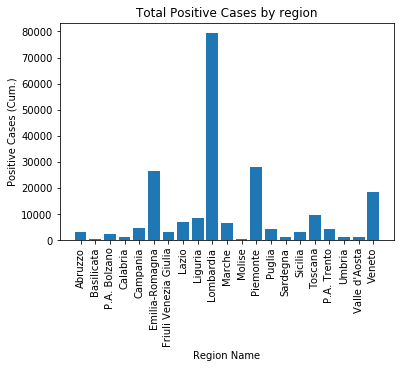

In [3]:
#total positive cases by region name:
fig, ax = plt.subplots()

ax.bar(df['RegionName'],df['TotalPositiveCases'])
ax.set_xlabel('Region Name')
ax.set_xticklabels(df['RegionName'], rotation=90)
ax.set_ylabel('Positive Cases (Cum.)')
ax.set_title('Total Positive Cases by region')

Text(0.5, 1.0, 'Total deaths by region')

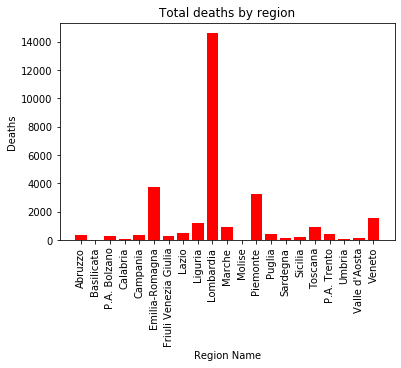

In [4]:
# plot of total deaths by region:
fig, ax = plt.subplots()

ax.bar(df['RegionName'],df['Deaths'], color='red')
ax.set_xlabel('Region Name')
ax.set_xticklabels(df['RegionName'], rotation=90)
ax.set_ylabel('Deaths')
ax.set_title('Total deaths by region')

Text(0.5, 1.0, 'Total Recovered by region')

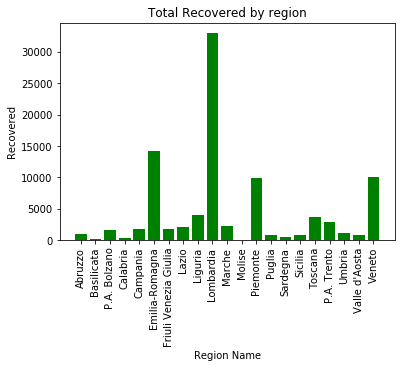

In [5]:
#total recoveries by region:
fig, ax = plt.subplots()

ax.bar(df['RegionName'],df['Recovered'], color='green')
ax.set_xlabel('Region Name')
ax.set_xticklabels(df['RegionName'], rotation=90)
ax.set_ylabel('Recovered')
ax.set_title('Total Recovered by region')

## 2. ANALYSIS OF THE KEY INDICATORS

We have seen the distribution of total positive cases, total deaths and total recoveries in part 1. In section let us try to run our analysis basing ourselves on some of the key indicators related to the spread, distribution and occurance of the COVID-19 pandemic. We will run our analysis trying to address the following 3 factors; 
2.1 How postive cases, deaths and recoveries changed over time(trend analysis).
2.2 Determine the distribution of cases by percentage hospitalized and percentage at home-confinement and the possible reasons behind the observations
2.3 Determine the differences between final outcomes and the possible causes to observed differences  

## 2.1 Trend analysis of cases, deaths and recoveries overtime

In [11]:
# Let us first begin by converting 'Date' to pandas datetime object:
pd.to_datetime(df['Date'])




0      2020-02-24 18:00:00
1      2020-02-24 18:00:00
2      2020-02-24 18:00:00
3      2020-02-24 18:00:00
4      2020-02-24 18:00:00
               ...        
1528   2020-05-06 17:00:00
1529   2020-05-06 17:00:00
1530   2020-05-06 17:00:00
1531   2020-05-06 17:00:00
1532   2020-05-06 17:00:00
Name: Date, Length: 1533, dtype: datetime64[ns]

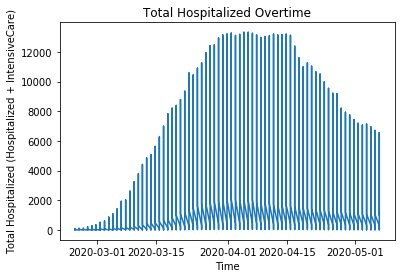

In [23]:
fig, ax = plt.subplots()

ax.plot(df['Date'], df['TotalHospitalizedPatients'])
ax.set_xlabel('Time')
ax.set_ylabel('Total Hospitalized (Hospitalized + IntensiveCare)')
ax.set_title('Total Hospitalized Overtime')
plt.show()


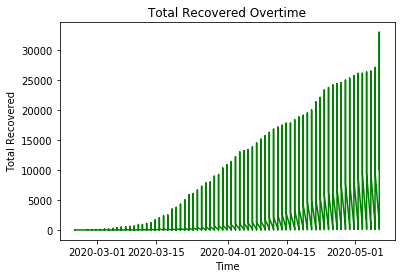

In [24]:
fig, ax = plt.subplots()

ax.plot(df['Date'], df['Recovered'], color='green')
ax.set_xlabel('Time')
ax.set_ylabel('Total Recovered')
ax.set_title('Total Recovered Overtime')
plt.show()




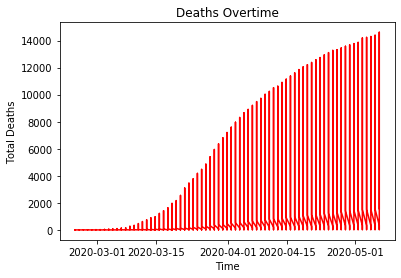

In [26]:
fig, ax = plt.subplots()

ax.plot(df['Date'], df['Deaths'], color='red')
ax.set_xlabel('Time')
ax.set_ylabel('Total Deaths')
ax.set_title('Deaths Overtime')
plt.show()

## 2.1.1 Interpretation 
We see from the 1st figure that there has been an upward trend of identified positive cases in Italy from the 1st March to 1st April, then the cases somewhat remained high but constant in the 1st 2 weeks of April and then a declining trend in the last 2 weeks of April until May the 7th. Taking a look at the second plot, we see that there has been some increases in the numbers recovered from beginning of March with even high increases observed towards end of April to beginning of May. The last figure shows sharp increases in the occurance of deaths from beginning of March to beginning of April. However, from April we see a somehow constant increase in the number of deaths to beginning of May.

## 2.2 This section shows the relationship between variables using Seaborn's regression plots 

In this section we determine the percentages of hospitalized patients and home-confined patients on the total positive cases.


In [75]:
#let us define our variables:

total_positive=df['TotalPositiveCases'].sum()
total_hospitalized=df['TotalHospitalizedPatients'].sum()
current_positive=df['CurrentPositiveCases'].sum()
deaths= df['Deaths'].sum()
recovered=df['Recovered'].sum()
home_confinement=df['HomeConfinement'].sum()


In [76]:
#let us now define our percentages:

percent_hospitalized=total_hospitalized/total_positive
percent_home_confinement=home_confinement/total_positive
percent_died=deaths/total_positive
percent_recovered=recovered/total_positive

In [77]:
print(percent_hospitalized)

0.1923375946044296


In [78]:
print(percent_home_confinement)

0.4230171807799001


## Intrepretation 

We see that out of total positive cases, 42.3% of them were at home-confinement while 19.2% was hospitalized. 

## 2.3 We will now try to establish the most likely outcome for patients in home confinement

In [79]:
print(percent_died)

0.12616726937791345


In [80]:
print(percent_recovered)

0.2584779552377569


## Interpretation 

We see that a greater percentage(25.8%) of positive cases has resulted in recoveries than deaths (12.6%) 

## CONCLUSION

From the analysis above we see that out of the total positive cases, hospitalized cases has risen sharply in the early stage of the pandemic, then remained constant for some time and then declined at a later stage while deaths have been rising sharply in the beginning but reaching a constant increase over time. Furthermore, looking at recovered cases, we have seen that they have been rising somewhat constantly from the beginning but have shown a further increase of late.The possible explanation to this observed scenarios is that maybe the society is beginning to realise the importance of self-isolation, social-distancing and proper hygiene in preventing both new infections and re-infections It is also observable that a greater percentage of positive cases has been held at home-confinement than hospitalized. 